## Architecture Diagram

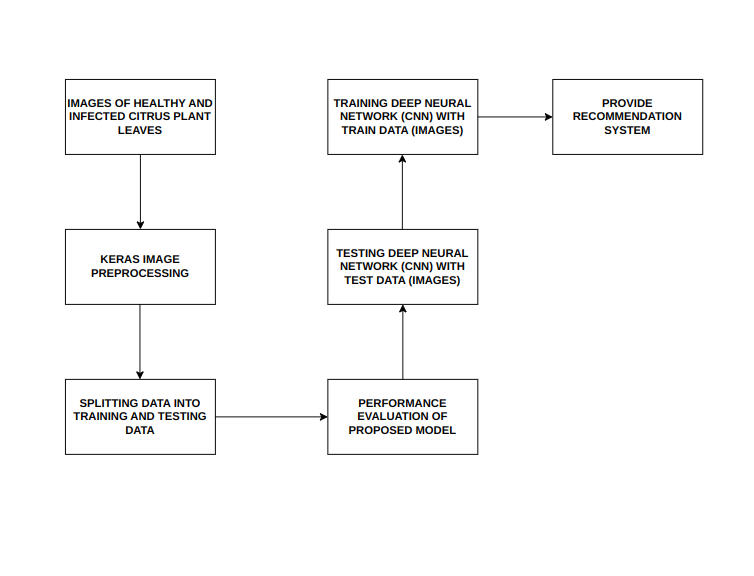

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

## 1. CNN MODEL

### UPLOADING DATA

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("Leaves",shuffle =True,image_size = (255, 255), batch_size = 32)

Found 1036 files belonging to 5 classes.


### CHECKING CLASSES PRESENT IN DATASET

In [3]:
len(dataset)

33

In [4]:
class_name=dataset.class_names
class_name

['Black spot', 'Melanose', 'canker', 'greening', 'healthy']

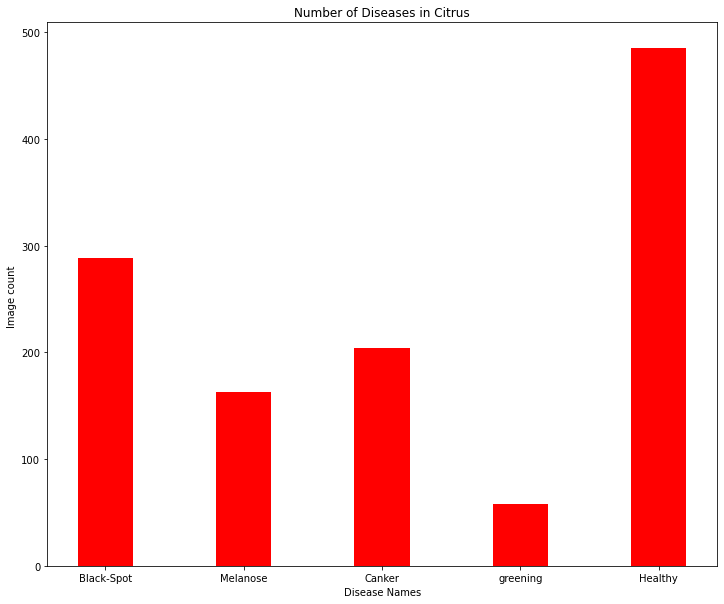

In [5]:
data = {'Black-Spot':288, 'Melanose':163, 'Canker':204,
        'greening':58,'Healthy':485}
Labels = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (12, 10))
plt.bar(Labels, values, color ='red',
        width = 0.4)
plt.xlabel("Disease Names")
plt.ylabel("Image count ")
plt.title("Number of Diseases in Citrus")
plt.show();

### PLOTTING THE IMAGES

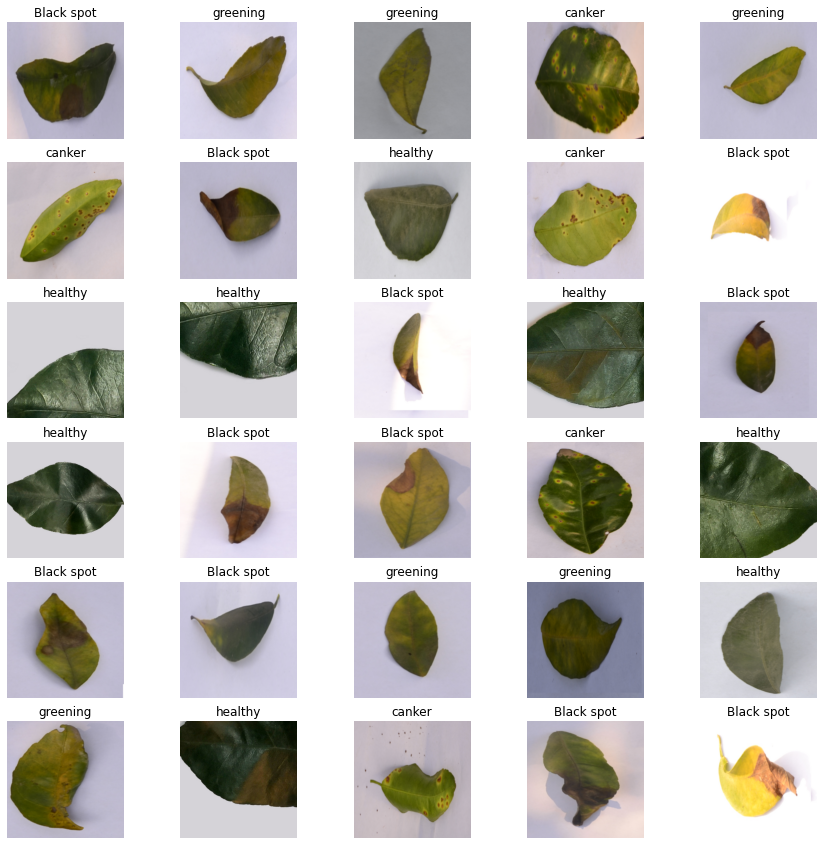

In [6]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
  for i in range(30):
    ax = plt.subplot(6,5,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[label_batch[i]])
    plt.axis("OFF") 

### DEFINING DATA FOR TRAINING, TESTING AND VALIDATION

In [7]:
def partition_of_data(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
   
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=10)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = partition_of_data(dataset)

In [9]:
len(train_ds)

26

In [10]:
len(val_ds)

3

In [11]:
len(test_ds)

4

### MODEL BUILDING

In [12]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(255, 255),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [13]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [14]:
input_shape = (32, 255, 255, 3)
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax'),
])


In [15]:
model.build(input_shape=input_shape)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 255, 255, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 253, 253, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 126, 126, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 124, 124, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [17]:
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [20]:
hist = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    epochs=10,verbose=1
)

Epoch 1/10
26/26 [==============================] - 55s 2s/step - loss: 1.1684 - accuracy: 0.4741 - val_loss: 0.8429 - val_accuracy: 0.5921
Epoch 2/10
26/26 [==============================] - 61s 2s/step - loss: 0.8051 - accuracy: 0.6322 - val_loss: 0.7159 - val_accuracy: 0.6875
Epoch 3/10
26/26 [==============================] - 55s 2s/step - loss: 0.7719 - accuracy: 0.6392 - val_loss: 0.6189 - val_accuracy: 0.6979
Epoch 4/10
26/26 [==============================] - 58s 2s/step - loss: 0.6882 - accuracy: 0.6921 - val_loss: 0.6095 - val_accuracy: 0.7812
Epoch 5/10
26/26 [==============================] - 59s 2s/step - loss: 0.6491 - accuracy: 0.7094 - val_loss: 0.5762 - val_accuracy: 0.7188
Epoch 6/10
26/26 [==============================] - 63s 2s/step - loss: 0.5896 - accuracy: 0.7512 - val_loss: 0.7437 - val_accuracy: 0.6875
Epoch 7/10
26/26 [==============================] - 63s 2s/step - loss: 0.5716 - accuracy: 0.7488 - val_loss: 0.5879 - val_accuracy: 0.7500
Epoch 8/10
26/26 [==

## MODEL EVALUATION

In [21]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 5s 461ms/step - loss: 0.4455 - accuracy: 0.8333


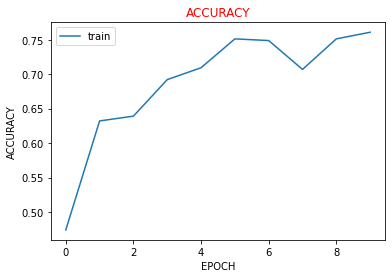

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title("ACCURACY",color="red")
plt.ylabel("ACCURACY")
plt.xlabel("EPOCH")
plt.legend(['train'],loc='upper left')
plt.show()   

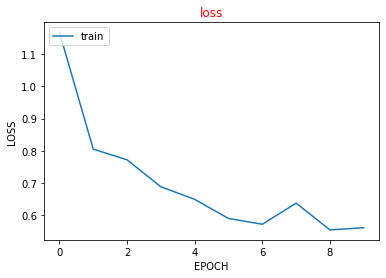

In [23]:
plt.plot(hist.history['loss'])
plt.title("loss",color="red")
plt.ylabel("LOSS")
plt.xlabel("EPOCH")
plt.legend(['train'],loc='upper left')
plt.show()   

In [24]:
y_pre=model.predict(test_ds)
y_class=[np.argmax(i) for i in y_pre]
print("Predicted Classes :-",y_class[:10])


4/4 [==============================] - 5s 570ms/step
Predicted Classes :- [4, 0, 4, 4, 4, 0, 4, 4, 4, 0]


1/1 [==============================] - 0s 68ms/step


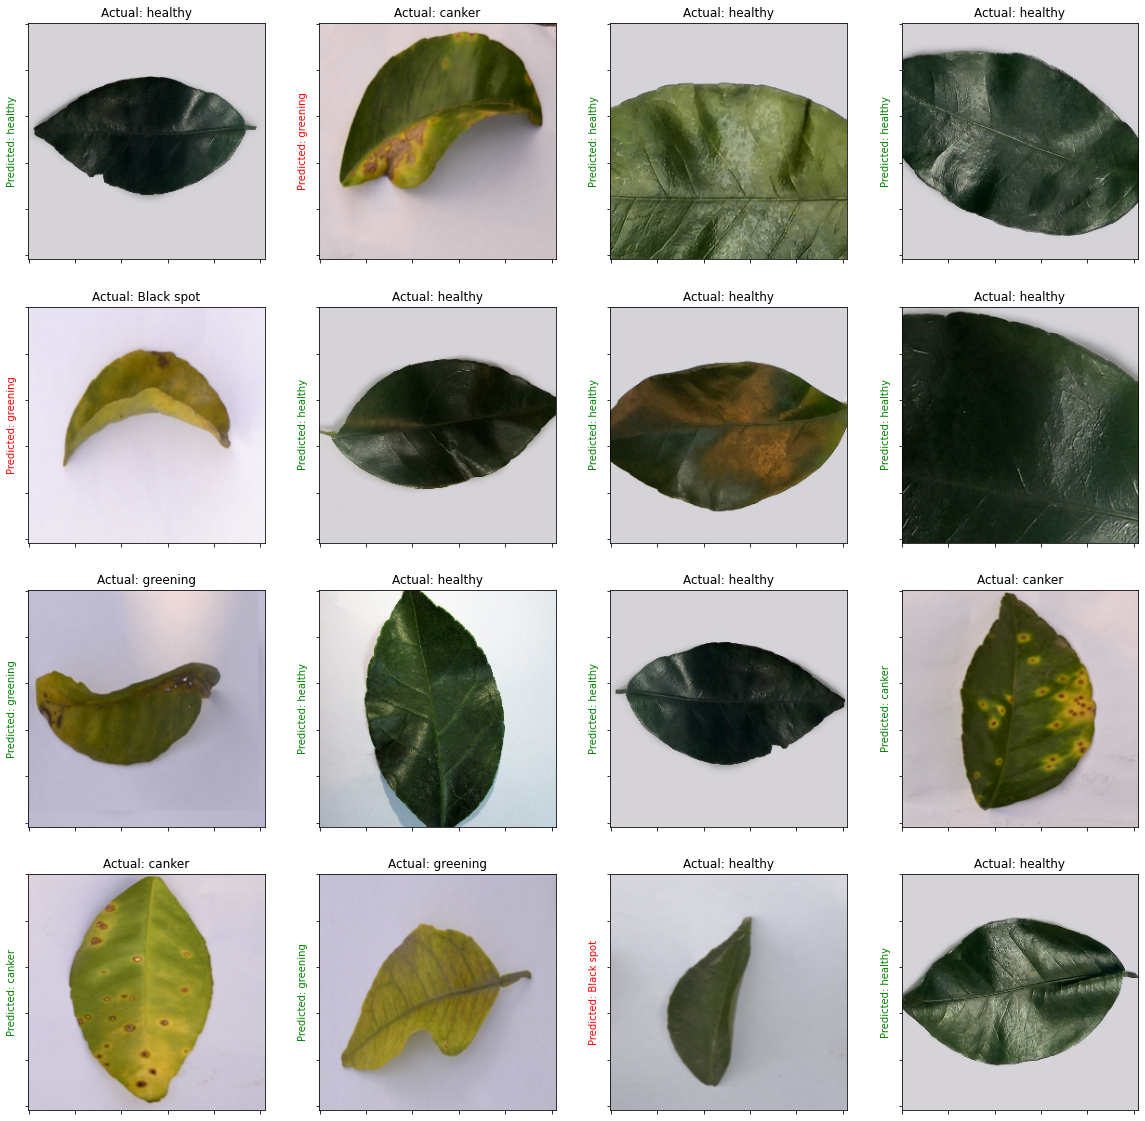

In [25]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_name[labels[i]]==class_name[np.argmax(score)]):
            plt.title("Actual: "+class_name[labels[i]])
            plt.ylabel("Predicted: "+class_name[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_name[labels[i]])
            plt.ylabel("Predicted: "+class_name[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

First Image of batch to predict :
Actual label :  healthy
1/1 [==============================] - 1s 590ms/step
Predicted label :  healthy


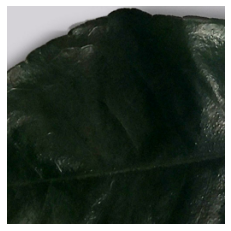

In [29]:
for batch_image, batch_label in train_ds.take(1):
    first_image = batch_image[0].numpy().astype('uint8')
    first_label = class_name[batch_label[0]]
    
    print('First Image of batch to predict :')
    plt.imshow(first_image)
    print('Actual label : ', first_label)
    
    batch_prediction = model.predict(batch_image)
    print('Predicted label : ', class_name[np.argmax(batch_prediction[0])])
    plt.axis('off')
